---

OASIS-1 es una valiosa colección de datos de resonancia magnética (RM) transversal que abarca a **416 sujetos** de entre **18 y 96 años**. Cada participante se sometió a entre tres y cuatro exploraciones de RM ponderadas en T1 durante una única sesión. Es importante destacar que todos los sujetos eran diestros, e incluían tanto a hombres como a mujeres. Un subconjunto significativo de esta cohorte, **100 sujetos mayores de 60 años**, fueron diagnosticados clínicamente con la enfermedad de Alzheimer en una fase de muy leve a moderada. Además, la recopilación incluye un conjunto de datos de fiabilidad de 20 sujetos sin demencia, a quienes se les realizaron imágenes dentro de los 90 días posteriores a su visita inicial, lo que añade una capa de robustez al estudio. 💪

El propósito central de OASIS-1 es proporcionar un conjunto de datos exhaustivo de RM transversal que cubra un amplio espectro de edades, desde adultos jóvenes y de mediana edad hasta personas mayores con y sin demencia. Estos datos son increíblemente valiosos para la investigación en neurociencia, especialmente para estudiar cómo el cerebro envejece de forma normal y cómo se ve afectado por enfermedades neurodegenerativas como el **Alzheimer**. Permiten a los investigadores analizar y comprender los cambios estructurales en el cerebro a lo largo de un amplio rango de edades y bajo diversas condiciones clínicas. 💡

---

Para analizar en profundidad estos datos de RM, una herramienta fundamental en la comunidad de la neurociencia es **FreeSurfer**. Se trata de un potente paquete de software de **código abierto** diseñado específicamente para procesar y analizar imágenes de resonancia magnética del cerebro. FreeSurfer ofrece una serie de capacidades de análisis automatizado que son esenciales para desentrañar la información contenida en conjuntos de datos como OASIS-1.

Entre sus funciones clave se incluyen:

* **Segmentación volumétrica:** Identifica y cuantifica el volumen de diferentes estructuras cerebrales como la sustancia gris, la sustancia blanca y el líquido cefalorraquídeo, así como subregiones específicas como el hipocampo o la amígdala. 🧠💧
* **Reconstrucción de la superficie cortical:** Crea modelos 3D detallados de la corteza cerebral que permiten medir métricas críticas como el grosor cortical, el área de la superficie y la curvatura del cerebro. Estas mediciones son cruciales para entender cómo evoluciona el cerebro con la edad y cómo se altera en diversas patologías neurológicas. 📈
* **Análisis estadístico:** Facilita el análisis estadístico, lo que permite a los investigadores realizar comparaciones significativas entre diferentes grupos de sujetos (por ejemplo, pacientes con Alzheimer versus controles sanos) o seguir los cambios en un mismo individuo a lo largo del tiempo. 📊

Al aplicar FreeSurfer a los escaneos de RM ponderados en T1 de OASIS-1, los investigadores pueden extraer medidas anatómicas cerebrales detalladas, como los cambios en el volumen de la materia gris en regiones específicas o el adelgazamiento de la corteza, que son indicadores vitales en el estudio de enfermedades como el Alzheimer. De hecho, la estrecha relación entre estos datos y las herramientas de análisis como FreeSurfer es tan fuerte que algunos conjuntos de datos OASIS más recientes, como OASIS-3, incluso ofrecen directamente las salidas preprocesadas con FreeSurfer para su descarga, simplificando aún más la investigación.✨

Por ese mitivo hemos decidido usar como primer acercamiento OASIS-1.

In [5]:
import nibabel as nib
import scipy.ndimage as ndi 
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import pandas as pd

In [48]:
crossSectional = pd.read_excel("oasis_cross-sectional.xlsx")
ND = crossSectional[crossSectional["CDR"] == 0];VM = crossSectional[crossSectional["CDR"] == 0.5];MiD = crossSectional[crossSectional["CDR"] == 1];MoD = crossSectional[crossSectional["CDR"] == 2]

In [50]:
print("\nDescripción estadística:")
display(crossSectional.describe(include='all'))
print("\nValores nulos por columna:")
display(crossSectional.isnull().sum())


Descripción estadística:


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436,436,436,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
unique,436,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,OAS1_0395_MR2,F,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,268,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,NaN,NaN,NaN,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,NaN,NaN,NaN,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,NaN,NaN,NaN,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,NaN,NaN,NaN,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,NaN,NaN,NaN,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000



Valores nulos por columna:


ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

In [ ]:
for i in ND.index:
    print(ND["ID"][i] + "/mri/norm.mgz")


OAS1_0001_MR1/mri/norm.mgz
OAS1_0002_MR1/mri/norm.mgz
OAS1_0010_MR1/mri/norm.mgz
OAS1_0011_MR1/mri/norm.mgz
OAS1_0013_MR1/mri/norm.mgz
OAS1_0018_MR1/mri/norm.mgz
OAS1_0019_MR1/mri/norm.mgz
OAS1_0020_MR1/mri/norm.mgz
OAS1_0026_MR1/mri/norm.mgz
OAS1_0030_MR1/mri/norm.mgz
OAS1_0032_MR1/mri/norm.mgz
OAS1_0033_MR1/mri/norm.mgz
OAS1_0034_MR1/mri/norm.mgz
OAS1_0044_MR1/mri/norm.mgz
OAS1_0058_MR1/mri/norm.mgz
OAS1_0062_MR1/mri/norm.mgz
OAS1_0064_MR1/mri/norm.mgz
OAS1_0065_MR1/mri/norm.mgz
OAS1_0068_MR1/mri/norm.mgz
OAS1_0069_MR1/mri/norm.mgz
OAS1_0070_MR1/mri/norm.mgz
OAS1_0071_MR1/mri/norm.mgz
OAS1_0072_MR1/mri/norm.mgz
OAS1_0074_MR1/mri/norm.mgz
OAS1_0075_MR1/mri/norm.mgz
OAS1_0078_MR1/mri/norm.mgz
OAS1_0083_MR1/mri/norm.mgz
OAS1_0085_MR1/mri/norm.mgz
OAS1_0086_MR1/mri/norm.mgz
OAS1_0096_MR1/mri/norm.mgz
OAS1_0106_MR1/mri/norm.mgz
OAS1_0109_MR1/mri/norm.mgz
OAS1_0110_MR1/mri/norm.mgz
OAS1_0112_MR1/mri/norm.mgz
OAS1_0113_MR1/mri/norm.mgz
OAS1_0114_MR1/mri/norm.mgz
OAS1_0116_MR1/mri/norm.mgz
O

In [ ]:
img = nib.load("/home/nicolas/Documentos/gliara/oasis_cs_freesurfer_disc1/disc1/OAS1_0001_MR1/mri/norm.mgz") # norm plis
data = img.get_fdata()

In [7]:
nx, ny, nz = data.shape
print(f"Dimensiones del volumen: {nx} (X) x {ny} (Y) x {nz} (Z)")
print(f"Tipo de datos (dtype): {data.dtype}")

Dimensiones del volumen: 256 (X) x 256 (Y) x 256 (Z)
Tipo de datos (dtype): float64


# Visualizar Neuroimagen
### Funcion para visualizar nib

In [8]:
def plot_slices(data):
    plt.figure(figsize=(15, 5))

    # Vista Axial (plano XY)
    slice_z_index = nz // 2
    ax1 = plt.subplot(1, 3, 1)
    ax1.imshow(data[:, :, slice_z_index].T, cmap='gray', origin='lower')
    ax1.set_title(f'Vista Axial (Z={slice_z_index})')
    ax1.axis('off')

    # Vista Coronal (plano XZ)
    slice_y_index = ny // 2
    ax2 = plt.subplot(1, 3, 2)
    ax2.imshow(data[:, slice_y_index, :].T, cmap='gray', origin='lower')
    ax2.set_title(f'Vista Coronal (Y={slice_y_index})')
    ax2.axis('off')

    # Vista Sagital (plano YZ)
    slice_x_index = nx // 2
    ax3 = plt.subplot(1, 3, 3)
    ax3.imshow(data[slice_x_index, :, :].T, cmap='gray', origin='lower')
    ax3.set_title(f'Vista Sagital (X={slice_x_index})')
    ax3.axis('off')

    plt.tight_layout()
    plt.show()
    return None


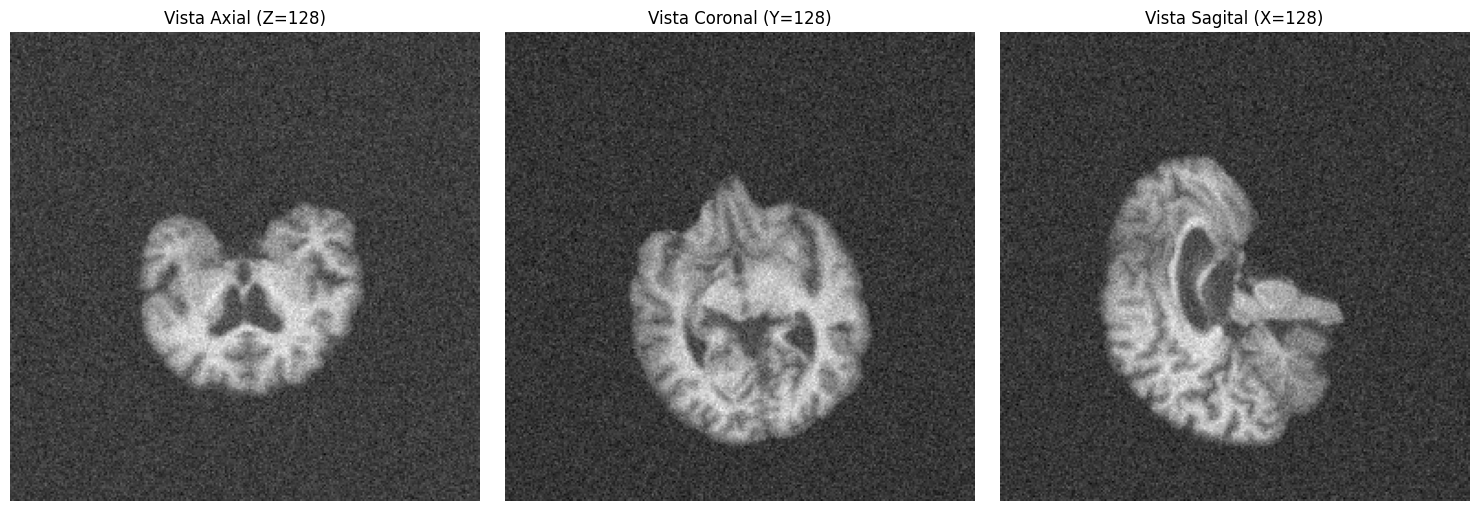

In [32]:
plot_slices(data)

# Aumentacion de datos

## Aumentacion de Neuroimagen

In [24]:
def random_rotation_3d(image, max_angle=10):
    angles = [random.uniform(-max_angle, max_angle) for _ in range(3)] # X, Y, Z
    rotated_image = image
    for axis, angle in enumerate(angles):
        rotated_image = ndi.rotate(rotated_image, angle, axes=(axis, (axis + 1) % 3),
                                   reshape=False, order=1, mode='nearest')
    return rotated_image

def random_shift_3d(image, max_shift_pixels=5):
    shift_x = random.randint(-max_shift_pixels, max_shift_pixels)
    shift_y = random.randint(-max_shift_pixels, max_shift_pixels)
    shift_z = random.randint(-max_shift_pixels, max_shift_pixels)
    shifted_image = ndi.shift(image, (shift_x, shift_y, shift_z), order=1, mode='nearest')
    return shifted_image

def random_intensity_scale(image, scale_factor_range=(0.8, 1.2), add_offset_range=(-0.1, 0.1)):
    scale_factor = random.uniform(*scale_factor_range)
    add_offset = random.uniform(*add_offset_range)
    augmented_image = image * scale_factor + add_offset
    return augmented_image

def add_gaussian_noise(image, noise_std_dev=0.03):
    noise = np.random.normal(0, noise_std_dev, image.shape)
    augmented_image = image + noise
    return augmented_image

def normalize_image(image):
    min_val = image.min()
    max_val = image.max()
    if max_val - min_val > 0:
        return (image - min_val) / (max_val - min_val)
    return image 

def apply_augmentations(image):
    image = random_rotation_3d(image, max_angle=10)
    image = random_shift_3d(image, max_shift_pixels=5)
    image = random_intensity_scale(image, scale_factor_range=(0.8, 1.2), add_offset_range=(-0.1, 0.1))
    image = add_gaussian_noise(image, noise_std_dev=0.05)
    return normalize_image(image)

## Aumentacion de stats

In [31]:
data = apply_augmentations(data)